In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import hvplot.pandas
from scipy import stats

ModuleNotFoundError: No module named 'hvplot'

In [ ]:
import seaborn as sns #statastical graph plotting
%matplotlib inline

ModuleNotFoundError: No module named 'seaborn'

In [15]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [16]:
heart = pd.read_csv('heart.csv') #for reading csv files

In [17]:
heart.head() #first 5 entries

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


age - age in years
sex - (1 = male; 0 = female)
cp - chest pain type
0: Typical angina: chest pain related decrease blood supply to the heart
1: Atypical angina: chest pain not related to heart
2: Non-anginal pain: typically esophageal spasms (non heart related)
3: Asymptomatic: chest pain not showing signs of disease
trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
chol - serum cholestoral in mg/dl
serum = LDL + HDL + .2 * triglycerides
above 200 is cause for concern
fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
'>126' mg/dL signals diabetes
restecg - resting electrocardiographic results
0: Nothing to note
1: ST-T Wave abnormality
can range from mild symptoms to severe problems
signals non-normal heart beat
2: Possible or definite left ventricular hypertrophy
Enlarged heart's main pumping chamber
thalach - maximum heart rate achieved
exang - exercise induced angina (1 = yes; 0 = no)
oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
slope - the slope of the peak exercise ST segment
0: Upsloping: better heart rate with excercise (uncommon)
1: Flatsloping: minimal change (typical healthy heart)
2: Downslopins: signs of unhealthy heart
ca - number of major vessels (0-3) colored by flourosopy
colored vessel means the doctor can see the blood passing through
the more blood movement the better (no clots)
thal - thalium stress result
1,3: normal
6: fixed defect: used to be defect but ok now
7: reversable defect: no proper blood movement when excercising
target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [18]:
heart.nunique(axis=0)#unique values (0 for rowwise and 1 for clnwise)

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [19]:
pd.set_option("display.float", "{:.2f}".format)
heart.describe() #display some mathematical properties related to our data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [20]:
x1=heart.target.unique() #stores the unique values in target col
y1=heart['target'].value_counts() # counts the distinct values in target


In [21]:
# Checking for messing values
heart.isna().sum() #check for NA values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [22]:
categorical_val = []
continous_val = []
for column in heart.columns:
    if len(heart[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [23]:
sns.barplot(x=x1 ,y=y1)

NameError: name 'sns' is not defined

In [24]:
sns.countplot(x='age', hue = 'target',data = heart) #value be taken on x axis, value to be plotted, dataframe
fig=plt.gcf() #get current figure
fig.set_size_inches(16,10)

NameError: name 'sns' is not defined

In [25]:
plt.figure(figsize=(15, 15))
#make a figure(width, height)
for i, column in enumerateerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    heart[heart["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    heart[heart["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

NameError: name 'enumerateerate' is not defined

<Figure size 1500x1500 with 0 Axes>

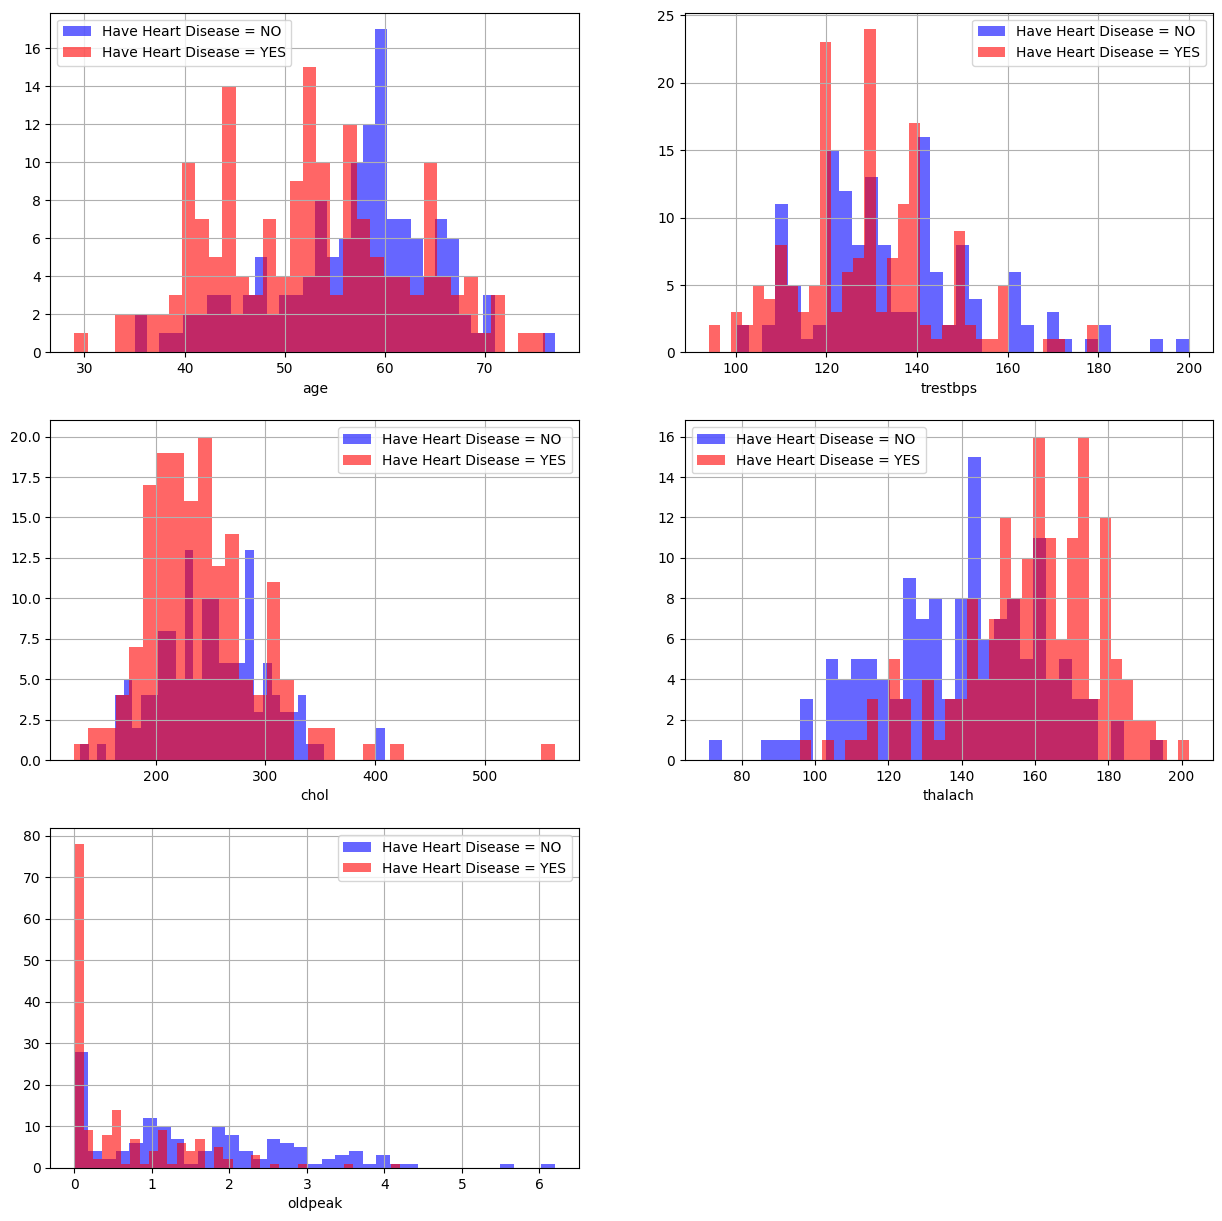

In [26]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    heart[heart["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    heart[heart["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

# Age vs. Max Heart Rate for Heart Disease

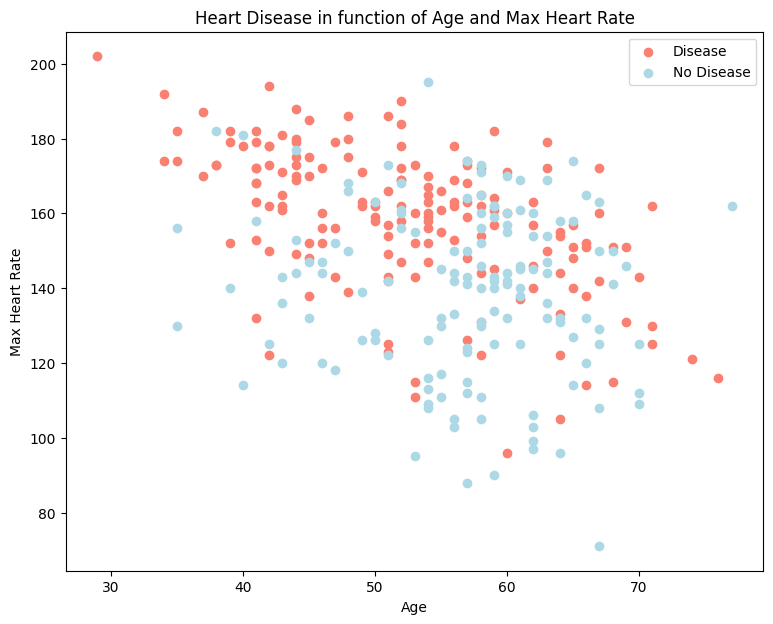

In [27]:
# Create another figure
plt.figure(figsize=(9, 7))

# Scatter with positive examples
plt.scatter(heart.age[heart.target==1],
            heart.thalach[heart.target==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(heart.age[heart.target==0],
            heart.thalach[heart.target==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

NameError: name 'sns' is not defined

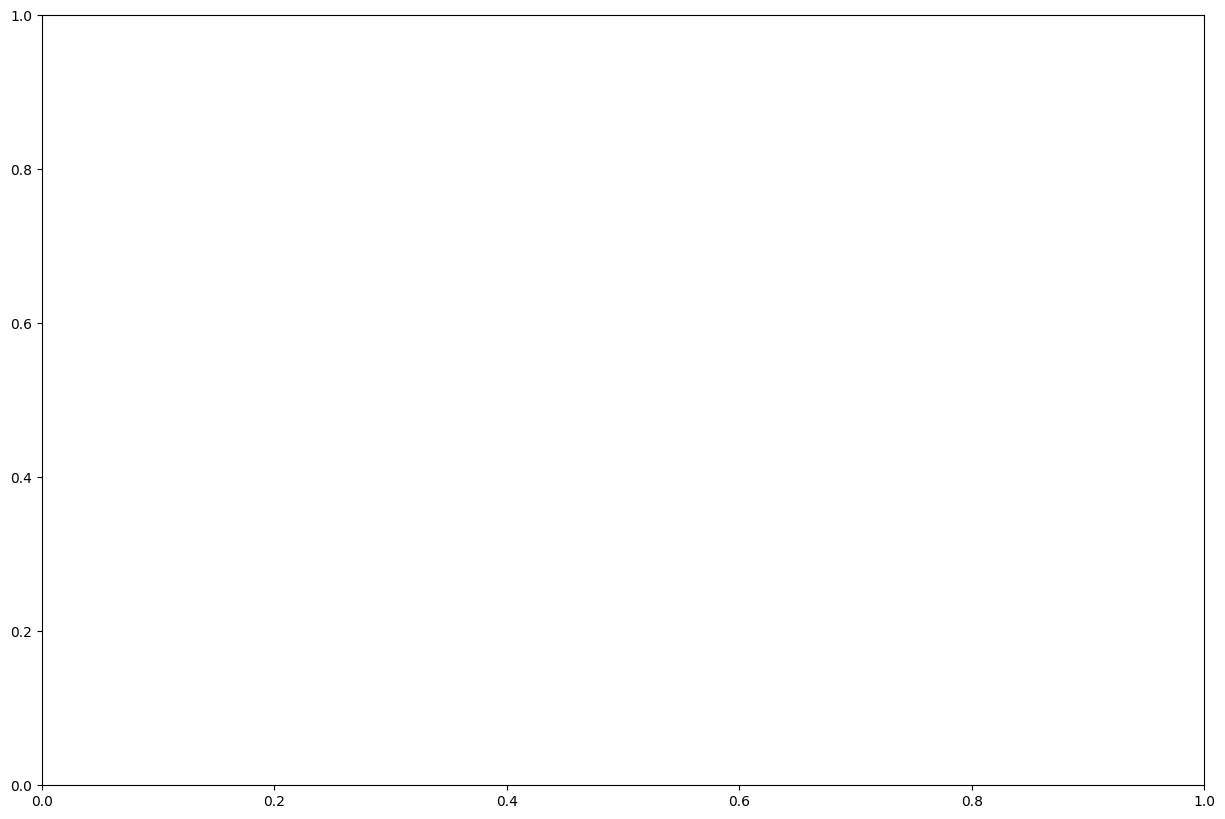

In [28]:
corr = heart.corr() #returns the pairwise correlation
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
            annot=True,
            cmap=sns.diverging_palette(220, 20,as_cmap=True))
#heatmap contains values representing various shades of the same colour for each value to be plotted.

In [29]:
heart.drop('target', axis=1).corrwith(heart.target).hvplot.barh(
    width=600, height=400, 
    title="Correlation between Heart Disease and Numeric Features", 
    ylabel='Correlation', xlabel='Numerical Features',
)

AttributeError: 'Series' object has no attribute 'hvplot'

In [ ]:
X = heart.iloc[:, :-1].values
y = heart.iloc[:, -1].values


# MODEL BUILDING

In [30]:

#MODEL BUILDING
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 87.19%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.87   0.87      0.87       0.87          0.87
recall      0.83   0.90      0.87       0.87          0.87
f1-score    0.85   0.89      0.87       0.87          0.87
support   108.00 134.00      0.87     242.00        242.00
_______________________________________________
Confusion Matrix: 
 [[ 90  18]
 [ 13 121]]

Test Result:
Accuracy Score: 73.77%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.77  0.71      0.74       0.74          0.74
recall     0.67  0.81      0.74       0.74          0.74
f1-score   0.71  0.76      0.74       0.74          0.74
support   30.00 31.00      0.74      61.00         61.00
_______________________________________________
Confusion Matrix: 
 [[20 10]
 [ 6 25]]

Train Result:
Accuracy Sc

# K-nearest neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 88.02%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.88   0.88      0.88       0.88          0.88
recall      0.84   0.91      0.88       0.88          0.88
f1-score    0.86   0.89      0.88       0.88          0.88
support   108.00 134.00      0.88     242.00        242.00
_______________________________________________
Confusion Matrix: 
 [[ 91  17]
 [ 12 122]]

Test Result:
Accuracy Score: 75.41%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.78  0.74      0.75       0.76          0.76
recall     0.70  0.81      0.75       0.75          0.75
f1-score   0.74  0.77      0.75       0.75          0.75
support   30.00 31.00      0.75      61.00         61.00
_______________________________________________
Confusion Matrix: 
 [[21  9]
 [ 6 25]]

Train Result:
Accuracy Sc

# Support Vector machine

In [ ]:
from sklearn.svm import SVC


svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 94.63%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.96   0.94      0.95       0.95          0.95
recall      0.92   0.97      0.95       0.94          0.95
f1-score    0.94   0.95      0.95       0.95          0.95
support   108.00 134.00      0.95     242.00        242.00
_______________________________________________
Confusion Matrix: 
 [[ 99   9]
 [  4 130]]

Test Result:
Accuracy Score: 75.41%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.80  0.72      0.75       0.76          0.76
recall     0.67  0.84      0.75       0.75          0.75
f1-score   0.73  0.78      0.75       0.75          0.75
support   30.00 31.00      0.75      61.00         61.00
_______________________________________________
Confusion Matrix: 
 [[20 10]
 [ 5 26]]

Train Result:
Accuracy Sc

# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   108.00 134.00      1.00     242.00        242.00
_______________________________________________
Confusion Matrix: 
 [[108   0]
 [  0 134]]

Test Result:
Accuracy Score: 67.21%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.68  0.67      0.67       0.67          0.67
recall     0.63  0.71      0.67       0.67          0.67
f1-score   0.66  0.69      0.67       0.67          0.67
support   30.00 31.00      0.67      61.00         61.00
_______________________________________________
Confusion Matrix: 
 [[19 11]
 [ 9 22]]

Train Result:
Accuracy S

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)


Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   108.00 134.00      1.00     242.00        242.00
_______________________________________________
Confusion Matrix: 
 [[108   0]
 [  0 134]]

Test Result:
Accuracy Score: 78.69%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.84  0.75      0.79       0.79          0.79
recall     0.70  0.87      0.79       0.79          0.79
f1-score   0.76  0.81      0.79       0.78          0.79
support   30.00 31.00      0.79      61.00         61.00
_______________________________________________
Confusion Matrix: 
 [[21  9]
 [ 4 27]]

Train Result:
Accuracy S

# XGBoost Classifer

In [4]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(use_label_encoder=False)
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

ModuleNotFoundError: No module named 'xgboost'

According to the above models the **Random Forest Classifier** has highest accuracy now we will use it for further predictions

# Input For Predictions

0 - Represent Negative For Heart Diagnosis 

1 - Represent Positive For Heart Diagnosis 

In [ ]:
print(rf_clf.predict(sc.transform([[62,1,1,120,281,0,0,103,0,1.4,1,1,3]])))



[0]
[0]


In [ ]:

print(rf_clf.predict(sc.transform([[20,1,2,110,230,1,1,140,1,2.2,2,0,2]])))

[1]
[1]
